Nbextension插件开启各功能，如目录

In [2]:
import  torch

## 1.基本数据类型

**All is about Tensor**

| python | pytorch |
|:--------:|:------------:|
|Int     | IntTensor of size()  |
|float   | FloatTensor of size()|
|Int array |IntTensor of size[d1,d2,...]|
|Float array|FloatTensor of size[d1,d2,...]
|string | ..|

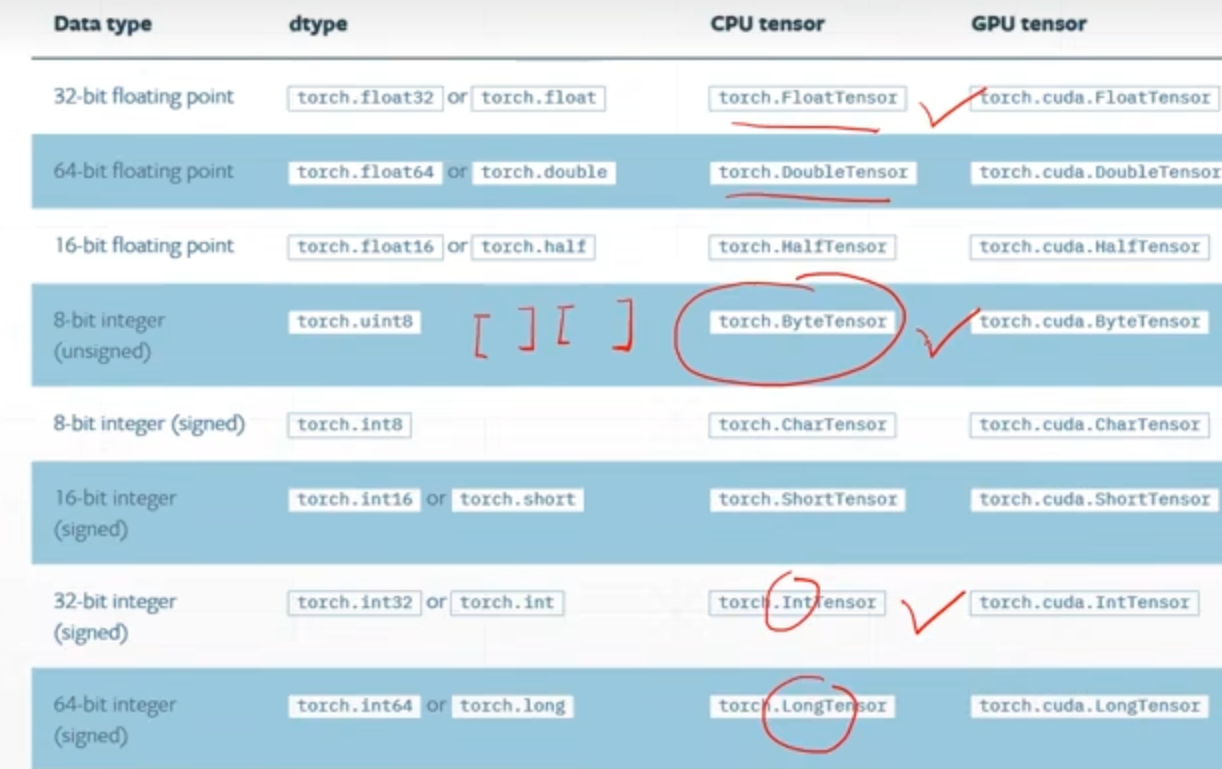

**如何表示string**:编码

- one hot

- Embedding(体现相关性） 
    - Word2vec
    - glove

### 做类型判断

a.type()

isinstance(a,torch.Tensor)

In [18]:
import torch
a = torch.randn(2,3) ##N(0,1)正态分布随机初始化一个两行三列的tensor
a.type()  

'torch.FloatTensor'

In [3]:
type(a) ##这个用的少，不精确

torch.Tensor

In [5]:
isinstance(a,torch.Tensor)

True

In [6]:
isinstance(a,torch.FloatTensor)

True

In [20]:
isinstance(a,torch.cuda.FloatTensor)

False

In [19]:
data = a.cuda()
isinstance(data,torch.cuda.FloatTensor)

True

### dimension 0/rank 0

In [21]:
torch.tensor(1.)

tensor(1.)

In [23]:
torch.tensor(1.3)

tensor(1.3000)

In [26]:
a = torch.tensor(2.2)  ###维度为0的标量
a.shape
len(a.shape)
a.size()

torch.Size([])

In [36]:
A = torch.tensor([2.2,1])##tensor张量
A.shape
len(A.shape)
A.size()

torch.Size([2])

### dimension 1/rank 1

dimension=1 一维 一般是只有行或者列

dimension=2 二维 有行和列

In [51]:
torch.tensor([1.1])
torch.tensor([1.1,2.2])

torch.Size([2])

In [40]:
torch.FloatTensor(1)

tensor([nan])

In [42]:
torch.FloatTensor(2)##随机初始化长度为2的float tensor

tensor([nan, nan])

numpy 生成

In [49]:
import numpy as np
data = np.ones(2)
data

array([1., 1.])

In [48]:
torch.from_numpy(data)  ##数据类型和np发生不同

tensor([1., 1.], dtype=torch.float64)

In [55]:
A = torch.ones(2)

tensor([1., 1.])

In [56]:
A.shape

torch.Size([2])

### dimension2

常用场景：linear input batch

In [61]:
a = torch.randn(2,3)
a

tensor([[ 1.6578, -1.4617, -0.3261],
        [ 0.0484,  0.9057, -0.1366]])

In [62]:
a.shape

torch.Size([2, 3])

In [63]:
a.size()

torch.Size([2, 3])

In [66]:
a.shape[0]
a.shape[1]

3

In [68]:
a.size(0)
a.size(1)

3

### dimension3

常用场景：RNN input batch
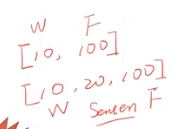

In [70]:
a = torch.rand(1,2,3)
a

tensor([[[0.5267, 0.6015, 0.4635],
         [0.3182, 0.0067, 0.0442]]])

In [72]:
a.shape


torch.Size([1, 2, 3])

In [73]:
a[0]

tensor([[0.5267, 0.6015, 0.4635],
        [0.3182, 0.0067, 0.0442]])

In [74]:
list(a.shape)

[1, 2, 3]

### dimension4

常用于图像

CNN：[b,c,h,w]  batchsize,channel,height,width

In [75]:
a = torch.rand(2,3,28,28) #随机生成shape为（2,3,28,28）的数据，在（0,1）之间
##两张图片 每张有三个通道（对应rgb，为1则是灰度图片) 长h 28 宽w 28
a

tensor([[[[0.7312, 0.5316, 0.2575,  ..., 0.5564, 0.5645, 0.2894],
          [0.4694, 0.8980, 0.3985,  ..., 0.0403, 0.5621, 0.8264],
          [0.2133, 0.7810, 0.6214,  ..., 0.8703, 0.0986, 0.0921],
          ...,
          [0.9490, 0.7038, 0.8833,  ..., 0.8255, 0.4156, 0.5922],
          [0.1041, 0.9655, 0.7375,  ..., 0.3524, 0.9135, 0.3265],
          [0.3880, 0.0983, 0.8824,  ..., 0.3564, 0.3851, 0.0486]],

         [[0.1606, 0.5892, 0.2304,  ..., 0.6336, 0.8456, 0.9549],
          [0.8393, 0.8795, 0.1126,  ..., 0.9063, 0.3529, 0.3528],
          [0.7176, 0.3378, 0.2023,  ..., 0.1547, 0.2209, 0.2126],
          ...,
          [0.7911, 0.6591, 0.9435,  ..., 0.8604, 0.3530, 0.9659],
          [0.1845, 0.7519, 0.2611,  ..., 0.6939, 0.2410, 0.9279],
          [0.2872, 0.6872, 0.2220,  ..., 0.0911, 0.2181, 0.6185]],

         [[0.0855, 0.9924, 0.1331,  ..., 0.6257, 0.0753, 0.7935],
          [0.5963, 0.2355, 0.0528,  ..., 0.7363, 0.8882, 0.4261],
          [0.4479, 0.4087, 0.2690,  ..., 0

In [76]:
a.shape

torch.Size([2, 3, 28, 28])

numel :: number of element
占用内存的大小

In [78]:
a.numel()

4704

In [79]:
a.dim()

4

## 2.创建tensor

### import from numpy


In [80]:
a = np.array([2,3.3])
torch.from_numpy(a)

tensor([2.0000, 3.3000], dtype=torch.float64)

In [81]:
a = np.ones([2,3])
torch.from_numpy(a)

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

### import from list

In [84]:
torch.tensor([2.,3.2])
torch.tensor([[2.,3.2],[1.,2.]])  ##传入list

tensor([[2.0000, 3.2000],
        [1.0000, 2.0000]])

In [86]:
torch.FloatTensor([2.,3.2])#传入list
torch.Tensor(2,3)##这里是shape 少用   ()传入的是shape,([])是list

tensor([[0., 0., 0.],
        [0., 0., 0.]])

### 未初始化的数据


未初始化的api
- Torch.empty()  ##参数为shape
- Torch.FloatTensor(d1,d2,d3)  ##对应shape
- Torch.IntTensor(d1,d2)

只是作为容器，后面记得将数据写进去

In [89]:
torch.empty(1)
torch.empty(1,1)

tensor([[0.]])

In [94]:
torch.Tensor(2,3)

tensor([[0.0000e+00, 0.0000e+00, 1.8754e+28],
        [1.6634e-04, 1.6900e-04, 1.0470e-11]])

In [91]:
torch.IntTensor(2,3)

tensor([[ 912338233,  808281145,  892876389],
        [ 878786657,  778133859, 1952543859]], dtype=torch.int32)

In [92]:
torch.FloatTensor(2,3)

tensor([[3.3554e-06, 6.3079e-10, 6.8624e-07],
        [2.0975e-07, 5.1246e-11, 7.1450e+31]])

可以观察到未初始化的，tensor内值是随机的，有的很大，有的很小。注意如果直接将未初始化的tensor喂给神经网络，可能会出现torch nan/inf等问题。

### 设置默认类型

torch.set_default_tensor_type(torch.DoubleTensor)

In [95]:
torch.tensor([1.2,3]).type()

'torch.FloatTensor'

In [96]:
torch.Tensor(2,3).type()

'torch.FloatTensor'

从上面可以看到默认的是floattensor

下面更改默认类型：

In [97]:
torch.set_default_tensor_type(torch.DoubleTensor)

In [98]:
torch.Tensor(2,3).type()

'torch.DoubleTensor'

可以看到被成功改了

In [99]:
torch.tensor([1.,2]).type()

'torch.DoubleTensor'

### 随机初始化

- rand
- rand_like
- randint
- randn

rand函数使用（0,1）的均值分布，随机生成 [0,1）之前的数值

In [100]:
torch.rand(3,3)

tensor([[0.4853, 0.1208, 0.2242],
        [0.8327, 0.5759, 0.6354],
        [0.7333, 0.6741, 0.4239]])

In [104]:
a = torch.rand(3,3)
torch.rand_like(a)

tensor([[0.0133, 0.2614, 0.2584],
        [0.4562, 0.8126, 0.0895],
        [0.8163, 0.9164, 0.7955]])

In [108]:
torch.randint(1,10,[3,3])#[1,10),shape为（3,3）

tensor([[8, 3, 8],
        [4, 7, 5],
        [1, 9, 2]])

randn 正态

torch.randn(x,y) x,y为shape

In [109]:
torch.randn(3,3)  #N(0,1)

tensor([[-0.1005,  0.2760, -2.4141],
        [ 0.8148, -1.7762, -0.9842],
        [ 0.8693,  0.1007,  0.9566]])

N(u,std）用法

torch.normal()返回的是一维，要用的话记得重新reshape

torch.full([x,y],a)   shape为[x,y]，值为a

torch.arange(1,0,-0.1)  从1到0，逐个-0.1,即得到tensor为[1,0.9,0.8,...0.1],注意不包括下限0.

In [119]:
torch.normal(mean=torch.full([10],0.),std=torch.arange(1,0,-0.1)) 
#如第一个数，符合N（0,1）;第二个符合N（0,0.9）

tensor([ 1.2226,  0.0016,  0.2748,  0.3647,  0.3840, -0.6171, -0.0581, -0.0476,
         0.6213, -0.0589])

In [123]:
A = torch.normal(mean=torch.full([10],0.),std=torch.arange(1,0,-0.1))

In [124]:
A.reshape(2,5)

tensor([[ 1.0886, -0.0199,  2.2643,  0.3404, -0.0875],
        [ 0.3122,  0.1983,  0.2199,  0.3631,  0.0335]])

### 全部赋值为一个元素 full

In [126]:
torch.full([2,3],7)  ##全部赋值为7，两行三列

tensor([[7, 7, 7],
        [7, 7, 7]])

In [127]:
torch.full([],7)  ##生成标量

tensor(7)

In [131]:
torch.full([1],7)  ##生成一维的
torch.full([2],7)

tensor([7, 7])

### arange/range

等差数列： torch.arange(min,max,d) （下限，上限，等差值）。注意是[min,max)

range可以废弃

In [132]:
torch.arange(0,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [133]:
torch.arange(0,10,2)

tensor([0, 2, 4, 6, 8])

In [134]:
torch.range(1,5)

C:\Users\34860\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


tensor([1., 2., 3., 4., 5.])

### linspace/logspace
与arange类似，但是第三个参数不是阶梯值，而是元素的数量(即等分切割的数量）
torch.linspace(min,max,steps=x)  注意是[min,max]

torch.logspcae(min,max,steps=x) 与linspace不同的是，返回的是base^y ，y为[min,max]之间等分x份的每一个值

In [135]:
torch.linspace(0,10,steps=4)

tensor([ 0.0000,  3.3333,  6.6667, 10.0000])

In [136]:
torch.linspace(0,10,steps=10)

tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000])

In [137]:
torch.linspace(0,10,steps=11)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [138]:
torch.logspace(0,-1,steps=10) ##这里base是10,默认是10

tensor([1.0000, 0.7743, 0.5995, 0.4642, 0.3594, 0.2783, 0.2154, 0.1668, 0.1292,
        0.1000])

In [139]:
torch.logspace(0,-1,steps=10,base=2)

tensor([1.0000, 0.9259, 0.8572, 0.7937, 0.7349, 0.6804, 0.6300, 0.5833, 0.5400,
        0.5000])

In [140]:
torch.logspace(0,1,steps=10)

tensor([ 1.0000,  1.2915,  1.6681,  2.1544,  2.7826,  3.5938,  4.6416,  5.9948,
         7.7426, 10.0000])

### Ones/zeros/eye

直接传入shape 

- ones 全为1
- zeros 全为0
- eye 单位矩阵。可以直接传入一个值，即代表方阵。注意如果不是方阵，就会多余的一行/列全为0

ones_like(a) 生成与a shape类似的全为1的矩阵

In [143]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [144]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [145]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [146]:
torch.eye(4,3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.]])

In [152]:
a = torch.zeros(3,4)
torch.ones_like(a)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [154]:
a = torch.ones(3,4)
torch.zeros_like(a)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### 随机打散 randperm
- randperm
- random.shuffle


In [156]:
torch.randperm(10) ##[0,10)随机打散

tensor([0, 6, 9, 2, 5, 7, 3, 8, 4, 1])

In [157]:
##两个矩阵 ，我们希望a和b被打散的时候实现同步配对，
#即a是两行三列的，b是两行两列的，将a和b的行实现同步打散
a = torch.rand(2,3)
b = torch.rand(2,2)

In [170]:
a,b

(tensor([[0.3163, 0.2243, 0.5094],
         [0.9574, 0.6599, 0.9783]]),
 tensor([[0.7245, 0.1771],
         [0.9115, 0.2553]]))

In [167]:
idx = torch.randperm(2) ##保存随机的种子idx
idx   

tensor([1, 0])

In [168]:
a[idx]  ###注意看，经过idx映射之后，a第一行和第二行互换了

tensor([[0.9574, 0.6599, 0.9783],
        [0.3163, 0.2243, 0.5094]])

In [169]:
b[idx] ##b的互换方式和a保持一致

tensor([[0.9115, 0.2553],
        [0.7245, 0.1771]])

## 3.索引与切片

### indexing
默认从最左边开始索引
dim0 first

In [173]:
a = torch.rand(4,3,28,28)
a[0].shape

torch.Size([3, 28, 28])

In [174]:
a[0,0].shape

torch.Size([28, 28])

In [175]:
a[0,0,2,4] ##对应具体索引号 

tensor(0.9363)

### 取前多少/后多少
切片


In [176]:
a.shape

torch.Size([4, 3, 28, 28])

In [177]:
a[:2].shape

torch.Size([2, 3, 28, 28])

In [178]:
a[:2,:1,:,:].shape

torch.Size([2, 1, 28, 28])

In [179]:
a[:2,:1].shape

torch.Size([2, 1, 28, 28])

In [180]:
a[:2,1:].shape

torch.Size([2, 2, 28, 28])

In [181]:
a[:2,-1:].shape

torch.Size([2, 1, 28, 28])

### 选取有间隔
start:end:step

In [182]:
a[:,:,0:28:2,0:28:3].shape

torch.Size([4, 3, 14, 10])

In [183]:
a[1:2].shape

torch.Size([1, 3, 28, 28])

In [184]:
a[:,:,0:28:2,0:28].shape

torch.Size([4, 3, 14, 28])

### 特定选取

index_select(dim,[x,y，z]) [x,y，z]为对应索引号列表 必须为tensor

In [188]:
a.index_select(0,torch.tensor([0,2,3])).shape
##把维度为0的对应 0,2,3 拿出

torch.Size([3, 3, 28, 28])

In [187]:
a.index_select(1,torch.tensor([1,2])).shape
##把维度为1的对应 1,2 拿出

torch.Size([4, 2, 28, 28])

In [189]:
a.index_select(2,torch.arange(28)).shape


torch.Size([4, 3, 28, 28])

### ...
表示任意多维度

仅仅是为了方便

In [190]:
a.shape

torch.Size([4, 3, 28, 28])

In [191]:
a[...].shape

torch.Size([4, 3, 28, 28])

In [192]:
a[0,...].shape

torch.Size([3, 28, 28])

In [193]:
a[:,1,...].shape

torch.Size([4, 28, 28])

### 通过掩码选取
masked_select（）

注意返回值会被打平

In [195]:
x = torch.randn(3,4)
x


tensor([[-0.0365,  1.0676,  0.6590, -2.3597],
        [-0.5974, -0.6023, -0.7787,  0.5905],
        [-0.5557,  0.3024, -0.6959, -0.2239]])

In [197]:
mask = x.ge(0.5)  ##great equal 大于等于0.5
mask

tensor([[False,  True,  True, False],
        [False, False, False,  True],
        [False, False, False, False]])

In [198]:
torch.masked_select(x,mask)

tensor([1.0676, 0.6590, 0.5905])

In [199]:
torch.masked_select(x,mask).shape

torch.Size([3])

### 通过flatten index选取
不常用

会打平以后选取

In [201]:
src = torch.randint(1,10,[3,3])
src

tensor([[3, 7, 1],
        [3, 2, 5],
        [6, 4, 4]])

In [204]:
torch.take(src,torch.tensor([0,1,6]))  ##实际就是将src展平后按照index选取

tensor([3, 7, 6])

## 4.维度变换

- view/reshape   维度重塑
- squeeze/unsqueeze  维度增加减少
- expand/repeat  扩张
- transpose/t/permute  交换 单次 多次


### 1. view/reshape
两个是一样的：

0.3版本是view，0.4之后增加reshape，以保持和numpy reshape一致

view 只适合对满足连续性条件 (contiguous) 的 Tensor进行操作，而reshape 同时还可以对不满足连续性条件的 Tensor 进行操作，具有更好的鲁棒性。

view的开销可能更少，因为是一种视图的浅拷贝。

In [205]:
a = torch.rand(4,1,28,28)
a.shape

torch.Size([4, 1, 28, 28])

In [207]:
a.view(4,28*28)  
##将（4,1,28,28）变换成(4,1*28*28) 非常适用于全连接层操作，因为要展平

tensor([[0.4654, 0.4075, 0.3719,  ..., 0.8904, 0.3116, 0.3722],
        [0.9550, 0.6058, 0.4375,  ..., 0.3877, 0.0079, 0.0862],
        [0.8001, 0.4989, 0.1044,  ..., 0.1362, 0.9069, 0.5581],
        [0.2147, 0.7982, 0.3326,  ..., 0.5341, 0.1689, 0.2136]])

In [208]:
a.view(4,28*28).shape

torch.Size([4, 784])

In [210]:
a.view(4*28,28).shape   ##关注点只在于像素点阵列

torch.Size([112, 28])

In [211]:
a.view(4*1,28,28).shape ##不关注来自于哪一个batch,哪一个channel，只关注图片本身

torch.Size([4, 28, 28])

In [ ]:
b = a.view(4,28*28) #b是a 变换之后的新的理解结果
b.view(4,1,28,28) ##只有了解维度的先后顺序，才能在拿到b之后还原a
###否则 logic bug
b.view(4,28,28,1)###虽然这样也能运行，但是不是原来的维度信息
###另外，必须保证维度计算没有问题，如变成（4,783）是会报错

### 2. squeeze vs unsqueeze
挤压 vs 展开

减小维度 vs 增加维度

并没有改变数据本身，只是改变数据的理解方式

In [215]:
a.shape

torch.Size([4, 1, 28, 28])

In [216]:
a.unsqueeze(0).shape ##增加了一个维度 参数是位置，维度0的地方插入

torch.Size([1, 4, 1, 28, 28])

In [217]:
a.unsqueeze(-1).shape ##在最后一个维度位置增加一个维度

torch.Size([4, 1, 28, 28, 1])

In [218]:
a.unsqueeze(4).shape  ##总共有四个维度，因而这个与参数-1结果一致

torch.Size([4, 1, 28, 28, 1])

In [219]:
a.unsqueeze(-5).shape

torch.Size([1, 4, 1, 28, 28])

In [220]:
a.unsqueeze(5).shape

IndexError: Dimension out of range (expected to be in range of [-5, 4], but got 5)

**a.unsqueeze(index)**
- **index 为正，则在该index位置之前插入**
- **index 为负，则在该index位置之后插入**

In [221]:
b =  torch.tensor([1.2,2.3])  ##[2]
b.unsqueeze(-1)  ##[2.1]  在最后一个维度之后插入  结果就是给每一个元素再加一个[]

tensor([[1.2000],
        [2.3000]])

In [ ]:
b.unsqueeze(0) ##[1,2]   在第0个维度之前插入   结果就是在最外面加一个[]

例子

In [224]:
b = torch.rand(32)
f = torch.rand(4,32,14,14)
b = b.unsqueeze(1).unsqueeze(2).unsqueeze(0)
b.shape  ##至此b的维度和f一致

torch.Size([1, 32, 1, 1])

**squeeze**
维度删减

In [225]:
b.shape

torch.Size([1, 32, 1, 1])

In [227]:
b.squeeze().shape ##将所有1的都删了  注意数据不会变

torch.Size([32])

In [228]:
b.squeeze(0).shape ##挤压掉0维

torch.Size([32, 1, 1])

In [230]:
b.squeeze(-1).shape ##挤压最后一维

torch.Size([1, 32, 1])

In [231]:
b.squeeze(1).shape  ##维度1不是1，无效操作，没有报错

torch.Size([1, 32, 1, 1])

In [234]:
b.squeeze(-4).shape  ##和unsqueeze解释一致，是负值的后面，正值的前面

torch.Size([32, 1, 1])

### 3. expand/repeat
维度扩展
- expand : broadcasting  如将[1,32,1,1]变成[4,32,14,14]  没有改变数据本身
- repeat ： memory copied 结果与expand类似，但是是通过拷贝完成，所有缺失维度的数据为原数据复制一遍。
- expand_as(A)

expand不会主动拷贝数据，相对来说省内存。推荐使用expand

In [236]:
a = torch.rand(4,32,14,14)
b = torch.rand(1,32,1,1)
b.shape

torch.Size([1, 32, 1, 1])

In [237]:
b.expand(4,32,14,14).shape ##将[1, 32, 1, 1]变成了[4, 32, 14, 14]

torch.Size([4, 32, 14, 14])

**expand使用的限制条件：**

**1. 变成之前的与之后的维度一致。**

**2.只能将[1 x]变成[N x] 不是1的不能变**

In [240]:
b.expand(-1,32,-1,-1).shape  ###-1表示对应位置不进行扩张
##该结果将维度2的位置的内容扩张成32，因为原来就是32，所以不变

torch.Size([1, 32, 1, 1])

In [241]:
b.expand(4,32,-1,-1).shape

torch.Size([4, 32, 1, 1])

In [244]:
b.expand(-1,32,-1,-4).shape

torch.Size([1, 32, 1, -4])

**repeat**

expand 参数值是（N，-1，N，N）,将需要改变的位置置成相应的值，不需要的为-1，如果该位置置成的值与原来的值一致，不会报错，仍保持原始正常结果。

repeat 参数值是 （x,y,z,k) ，分别为对应的重复次数，为1则保持原样。

repeat耗费内存大:不再使用原来的数据，重新申请内存空间，复制数据出来

In [247]:
b.shape #torch.Size([1, 32, 1, 1])

torch.Size([1, 32, 1, 1])

In [248]:
b.repeat(4,32,1,1).shape  ##注意看第二个位置，变成了32(原来)*32

torch.Size([4, 1024, 1, 1])

In [249]:
b.repeat(4,1,1,1).shape  #[1, 32, 1, 1]==>[4, 32, 1, 1]

torch.Size([4, 32, 1, 1])

In [251]:
b.repeat(4,1,32,32).shape #[1, 32, 1, 1] ==> [4, 32, 32, 32]

torch.Size([4, 32, 32, 32])

### 4.transpose/t/permute

In [252]:
a = torch.randn(3,4)
a.t()

tensor([[-0.0335, -1.1327, -0.2442],
        [ 0.2679,  0.2014,  1.2185],
        [ 0.0312,  1.1204, -0.3940],
        [-0.1847, -0.5994, -0.4277]])

.t()矩阵转置只适用于2D的，1D、3D、4D都不能

**transpose**

一次两两交换，参数：要交换的index

In [256]:
a = torch.rand(4,3,32,32)
a.shape

torch.Size([4, 3, 32, 32])

In [263]:
a.transpose(1,3).shape  ##交换了index1和3的数据维度 类比于将[b c h w]==>[b w h c]

torch.Size([4, 32, 32, 3])

In [268]:
a.transpose(1,3).view(4,3*32*32).view(4,3,32,32)  ##会报错

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [269]:
a1 = a.transpose(1,3).contiguous().view(4,3*32*32).view(4,3,32,32)
##使用contiguous使得具备连续性，能够继续操作，但是该结果并没有成功还原

In [270]:
a2 = a.transpose(1,3).contiguous().view(4,3*32*32).view(4,32,32,3).transpose(1,3)
##成功还原的操作！！！

**必须保持数据维度顺序和存储顺序的一致，才能在变换之后保持数据不被污染。比如像前面那样view成transpose之后应该对应的维度再transpose回来**

**view要注意人为的跟踪，防止数据的污染**

验证：a2和a才一致，a1已经被污染了

In [272]:
a1.shape,a2.shape ##shape是一样没错

(torch.Size([4, 3, 32, 32]), torch.Size([4, 3, 32, 32]))

In [274]:
torch.all(torch.eq(a,a1))  ##eq函数判断数值是否一致，all函数判断所有数值是否一致

tensor(False)

In [275]:
torch.all(torch.eq(a,a2)) ##可以看到a2才是和a一致的

tensor(True)

**permute**

transpose只能交换一次，要达成一些交换，只能使用多次transpose

permute更方便，一次就行。参数：交换的映射关系  自动使用多次transpose

In [278]:
b = torch.rand(4,3,28,32)
b.shape

torch.Size([4, 3, 28, 32])

In [279]:
b.permute(0,2,3,1).shape   ##目标：（4,3,28,32）=》（4,28,32,3）
##映射关系为原来的位置置换成的新的顺序

torch.Size([4, 28, 32, 3])

transpose过程中可能会打乱内存，需要是用contiguous函数将内存空间再次变得连续

### 5. broadcasting

是自动的过程，一般用于A+B中会有Broadcasting的存在。

主要需要明确的是他的使用场景就可以。

自动扩展维度，且扩展的时候不需要拷贝数字

    相当于unsequeeze + expand

实施过程：

1. 从最低维度开始匹配，前面没有维度的话插入一个新的维度，即插入1
2. 将size1的维度扩展成对应的size

举例[32]的变成[4,32,14,14]的过程：
1. 首先将[32]手动变成[32,1,1]，以符合前提条件。
2. 低维度对齐（右边是低维度），接着按照过程1，将[32,1,1]变成[1,32,1,1]
3. 按照过程2，将[1,32,1,1]变成[4,32,14,14]

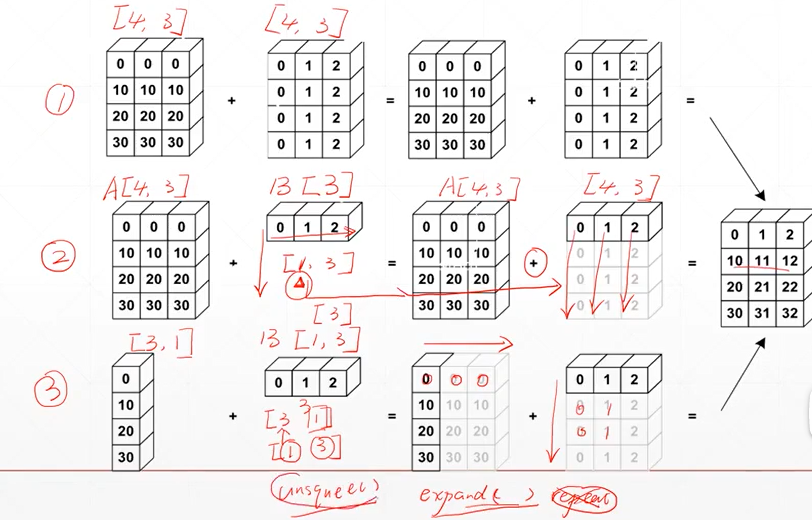

**match from last dim**

就是说 A + B， B是想加到A的最后一维上面。B可以是dim=0的标量，即A的最后一维，每一个值都加B的值；可以是dim=1，即A的最后一维刚好和B相加。

如果B是和A的低维不匹配，无法配对，无法正确使用broadcasting


1. A [4,32,14,14]  

   B [1,32,1,1]  符合
   
   B=>A的维度
   
    
2. A [4,32,14,14]
     
     B[14,14]  => [1,1,14,14] => [4,32,14,14] 符合
     
     
3. A [4,32,14,14]

    B [2,32,14,14] 不符合broadcast机制！

## 5.合并与分割

- cat
- stack
- split
- chunk

### cat
合并

torch.cat([a,b],dim=x)

注意保持合并的两个矩阵的除需要合并的维度外其他维度的一致

In [280]:
a = torch.rand(4,32,8)
b = torch.rand(5,32,8)
torch.cat([a,b],dim=0).shape ##合并0维

torch.Size([9, 32, 8])

In [281]:
a = torch.rand(4,32,8)
b = torch.rand(4,2,8)
torch.cat([a,b],dim=1).shape ##合并1维

torch.Size([4, 34, 8])

In [282]:
a = torch.rand(4,32,8)
b = torch.rand(5,2,8)
torch.cat([a,b],dim=1).shape ##合并1维

RuntimeError: Sizes of tensors must match except in dimension 1. Got 4 and 5 in dimension 0 (The offending index is 1)

### stack

相比cat的合并，stack会创建新的维度

In [284]:
a1 = torch.rand(4,3,16,32)
a2 = torch.rand(4,3,15,32)
torch.cat([a1,a2],dim=2).shape

torch.Size([4, 3, 31, 32])

In [285]:
torch.stack([a1,a2],dim=2).shape

RuntimeError: stack expects each tensor to be equal size, but got [4, 3, 16, 32] at entry 0 and [4, 3, 15, 32] at entry 1

对stack来说，A和B的维度必须完全一致

In [288]:
a1 = torch.rand(4,3,16,32)
a2 = torch.rand(4,3,16,32)
torch.stack([a1,a2],dim=2).shape

torch.Size([4, 3, 2, 16, 32])

### split
根据长度的拆分

- 根据每个单元分配的长度拆分
- 根据每个单元的长度拆分

In [292]:
a1 = torch.rand(4,3)
a2 = torch.rand(4,3)
c = torch.stack([a1,a2],dim=0)
c.shape

torch.Size([2, 4, 3])

按照每个单元分配的长度拆分：

c 的 dim=0的地方总共2个单元，拆分成1+1，即传入list[1,1]

In [294]:
aa,bb = c.split([1,1],dim=0)   
aa.shape,bb.shape    

(torch.Size([1, 4, 3]), torch.Size([1, 4, 3]))

按照每个单元长度拆分：

c 的 dim=0 的总共2个单元，拆分成每个长度都为1，传入标量1，因为总共2，所以总共拆分的单元总数是2/1=2

In [295]:
aa,bb = c.split(1,dim=0)   
aa.shape,bb.shape  

(torch.Size([1, 4, 3]), torch.Size([1, 4, 3]))

按照每个单元分配的数量拆分： 任意多个

传入list[x,y,z,...]

In [297]:
c = torch.rand(4,3)
aa,bb,cc = c.split([1,2,1],dim=0)
aa.shape,bb.shape,cc.shape

(torch.Size([1, 3]), torch.Size([2, 3]), torch.Size([1, 3]))

### chunk 
by num
传入参数，分成多少块，
和split的其中一个用法其实有点类似，但不一样。


In [299]:
c = torch.rand(4,3)
aa,bb = c.chunk(2,dim=0)
aa.shape,bb.shape

(torch.Size([2, 3]), torch.Size([2, 3]))

In [302]:
c = torch.rand(4,3)
aa,bb,cc,dd  = c.chunk(4,dim=0) ##维度0的地方均分成四块
aa.shape,bb.shape,cc.shape,dd.shape

(torch.Size([1, 3]),
 torch.Size([1, 3]),
 torch.Size([1, 3]),
 torch.Size([1, 3]))

## 6.数学运算
- add/minus/multiply/divide  推荐直接使用运算符
- matmul 矩阵相乘
- pow 次方
- sqrt/rsqrt
- exp/log
- 近似
    - floor  ceil
    - round
    - trunc frac
- clamp 裁剪

In [304]:
a = torch.rand(3,4)
b = torch.rand(4)

+

a+b/torch.add(a,b)

In [305]:
a+b##符合broadcasting，所以可以直接加

tensor([[0.5197, 1.7910, 1.3156, 0.5665],
        [0.9016, 1.5712, 1.1173, 1.3941],
        [0.2298, 1.0683, 0.8682, 1.1582]])

In [306]:
torch.add(a,b)  ##torch.add()

tensor([[0.5197, 1.7910, 1.3156, 0.5665],
        [0.9016, 1.5712, 1.1173, 1.3941],
        [0.2298, 1.0683, 0.8682, 1.1582]])

-

a-b/torch.sub(a,b)

In [307]:
torch.all(torch.eq(a-b,torch.sub(a,b)))

tensor(True)

*

a*b/torch.mul(a,b)

In [309]:
torch.all(torch.eq(a*b,torch.mul(a,b)))

tensor(True)

/

a/b  torch.div(a,b)

In [310]:
torch.all(torch.eq(a/b,torch.div(a,b)))

tensor(True)

In [311]:
torch.all(torch.eq(a//b,torch.div(a,b)))## //是整除 地板除

tensor(False)

### matmul  矩阵乘
- torch.mm 仅适用于2D
- torch.matmul
- @

直接使用*是元素乘

In [318]:
a = torch.ones(3,2)
a*2 ##矩阵内数值乘
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [321]:
b = torch.full([2,3],3.)
b

tensor([[3., 3., 3.],
        [3., 3., 3.]])

In [322]:
torch.mm(a,b)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

In [323]:
torch.matmul(a,b)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

In [324]:
a@b

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

In [328]:
b = torch.rand(4,512)
x = torch.rand(4,784)
w = torch.rand(512,784)
(x@w.t()+b).shape   ##通过将x与w相乘，实现x的降维

torch.Size([4, 512])

2D以上的矩阵的相乘实际上就是实现矩阵的并行相乘

a:（4,3,28,64）

b: (4,3,64,32)

a@b :(4,3,28,32)

---

a:（4,3,28,64）

b: (4,1,64,32)

a@b :(4,3,28,32) ##b进行了自动的broadingcast，变成(4,3,64,32)，所以可以运算

---
a:（4,3,28,64）

b: (4,2,64,32)

a@b :xx 失败  ##无法broadingcast 2！=1 且低纬度不配对；

### pow 次方

In [347]:
a  = torch.full([2,2],3,dtype=torch.float)
aa = a.pow(2)  ###数值的次方
aa

tensor([[9., 9.],
        [9., 9.]], dtype=torch.float32)

In [331]:
a**2

tensor([[9, 9],
        [9, 9]])

### sqrt/rsqrt 开方/开方后的倒数

In [348]:
aa.sqrt()

tensor([[3., 3.],
        [3., 3.]], dtype=torch.float32)

In [349]:
aa.rsqrt()

tensor([[0.3333, 0.3333],
        [0.3333, 0.3333]], dtype=torch.float32)

In [350]:
aa**0.5

tensor([[3., 3.],
        [3., 3.]], dtype=torch.float32)

### exp log

In [352]:
a = torch.exp(torch.ones(2,2))  ##e^x
a

tensor([[2.7183, 2.7183],
        [2.7183, 2.7183]])

In [353]:
torch.log(a) ##以e为底求指数 ，即 log运算

tensor([[1., 1.],
        [1., 1.]])

In [358]:
torch.log2(torch.ones(2,2))  ##log2以2为低

tensor([[0., 0.],
        [0., 0.]])

In [359]:
torch.log10(torch.ones(2,2))

tensor([[0., 0.],
        [0., 0.]])

### 近似
floor()向下取整

ceil向上取整

round 四舍五入

trunc frac 分别进行整数部分和小数部分的拆分

In [360]:
a =  torch.tensor(3.14)
a.floor(),a.ceil(),a.trunc(),a.frac()

(tensor(3.), tensor(4.), tensor(3.), tensor(0.1400))

In [361]:
a.round()

tensor(3.)

In [362]:
a = torch.tensor(3.5)
a.round()

tensor(4.)

### clamp  裁剪  
常用于梯度裁剪

梯度爆炸 ：梯度非常大 100 10^3

梯度弥散 ： 梯度趋近于0

查看梯度： w.grad.norm(2) 梯度的L2范数  100就很大了 正常应该比10 小

- (min) 小于min的都变成min
- (min,max) 在min，max之间  超过max的变成max,小于min的变成min

In [364]:
grad = torch.rand(2,3)*15
grad

tensor([[11.6236,  1.4880, 10.6327],
        [14.9044,  4.8969,  2.3634]])

In [365]:
grad.max()

tensor(14.9044)

In [366]:
grad.median()

tensor(4.8969)

In [368]:
grad.clamp(4)

tensor([[11.6236,  4.0000, 10.6327],
        [14.9044,  4.8969,  4.0000]])

In [369]:
grad.clamp(2,4)

tensor([[4.0000, 2.0000, 4.0000],
        [4.0000, 4.0000, 2.3634]])

## 统计属性

- norm
- mean sum min max prod(累乘）
- argmax argmin
- dim keepdim
- topk kthvalue
- compare

### norm

norm!=normalize   

normalize: batch_norm 

matrix norm vs vector norm

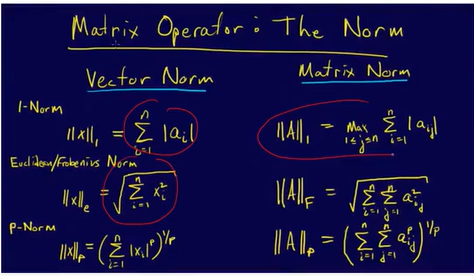

In [7]:
## norm-p
a = torch.full([8],1.)
b = a.view(2,4)
c= a.view(2,2,2)
b

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [9]:
c

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

1范数： 简单理解-所有元素求和

In [8]:
a.norm(1),b.norm(1),c.norm(1)

(tensor(8.), tensor(8.), tensor(8.))

2范数： 平方和开根号

In [10]:
a.norm(2),b.norm(2),c.norm(2)

(tensor(2.8284), tensor(2.8284), tensor(2.8284))

特定维度做范数

In [11]:
b.norm(1,dim=1)

tensor([4., 4.])

In [12]:
b.norm(2,dim=1)

tensor([2., 2.])

In [15]:
c.norm(1,dim=0)   ##取维度0实际上就会把维度0消掉，原本是[2,2,2]，求解结果是[2,2]的，就是将[2,2]的矩阵进行范数求解，以[2,2]为整体，拿出维度0索引0和索引1的矩阵进行相加为1范数。2范数同理。

tensor([[2., 2.],
        [2., 2.]])

In [14]:
c.norm(2,dim=0)

tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])

### mean sum min max prod

prod是累乘

In [17]:
a= torch.arange(8).view(2,4).float()

In [18]:
a.min(),a.max(),a.mean(),a.prod()

(tensor(0.), tensor(7.), tensor(3.5000), tensor(0.))

In [19]:
a.sum()

tensor(28.)

### argmax argmin

返回最大值的索引 最小值的索引

默认会将矩阵先打平，再给你返回索引

In [21]:
a.argmax(),a.argmin()

(tensor(7), tensor(0))

不想打平

In [22]:
a = torch.randn(4,10)
a[0]

tensor([-0.4851, -0.5728, -0.1540,  0.8599,  0.9069, -0.3042, -0.5920,  0.7177,
         0.3614, -0.5076])

In [23]:
a.argmax()

tensor(39)

In [25]:
a.argmax(dim=1)  ##返回shape[4]的，就每一行的结果（把维度dim=1的拿去计算了）

tensor([4, 3, 7, 9])

In [26]:
a.max(dim=1)

torch.return_types.max(
values=tensor([0.9069, 1.2145, 0.7587, 1.5159]),
indices=tensor([4, 3, 7, 9]))

### dim keepdim

In [27]:
a.max(dim=1)

torch.return_types.max(
values=tensor([0.9069, 1.2145, 0.7587, 1.5159]),
indices=tensor([4, 3, 7, 9]))

In [28]:
a.max(dim=1,keepdim=True) ##keepdim=True，由原本会返回的[4]，变成了[4,1]

torch.return_types.max(
values=tensor([[0.9069],
        [1.2145],
        [0.7587],
        [1.5159]]),
indices=tensor([[4],
        [3],
        [7],
        [9]]))

In [30]:
a.argmax(dim=1,keepdim=True)  ##同理

tensor([[4],
        [3],
        [7],
        [9]])

### topk or k-th

a.topk(x,dim=) x表示最大的x个。 默认返回最大的k个，largest=false则返回最小的

In [31]:
a.topk(3,dim=1)  ##返回最大的三个

torch.return_types.topk(
values=tensor([[0.9069, 0.8599, 0.7177],
        [1.2145, 0.9650, 0.7356],
        [0.7587, 0.7106, 0.6616],
        [1.5159, 0.3170, 0.2589]]),
indices=tensor([[4, 3, 7],
        [3, 9, 1],
        [7, 1, 9],
        [9, 4, 0]]))

In [34]:
a.topk(3,dim=1,largest=False) ##最小的k个  largest没设置默认为最大的（True)

torch.return_types.topk(
values=tensor([[-0.5920, -0.5728, -0.5076],
        [-1.2707, -0.9278, -0.5812],
        [-1.0028, -0.6212, -0.5332],
        [-1.7463, -1.6353, -0.6949]]),
indices=tensor([[6, 1, 9],
        [0, 2, 8],
        [4, 8, 2],
        [6, 8, 3]]))

a.kthvalue(x,dim=) x表示第k小的 返回值

In [35]:
a.kthvalue(8,dim=1)##第8小

torch.return_types.kthvalue(
values=tensor([0.7177, 0.7356, 0.6616, 0.2589]),
indices=tensor([7, 1, 9, 0]))

In [37]:
a.kthvalue(8,dim=1,keepdim=True)

torch.return_types.kthvalue(
values=tensor([[0.7177],
        [0.7356],
        [0.6616],
        [0.2589]]),
indices=tensor([[7],
        [1],
        [9],
        [0]]))

In [40]:
a.kthvalue(8)

torch.return_types.kthvalue(
values=tensor([0.7177, 0.7356, 0.6616, 0.2589]),
indices=tensor([7, 1, 9, 0]))

### compare

- \> \>= <<= != ==

torch.gt()

torch.eq()

torch.equal()

In [41]:
a>0

tensor([[False, False, False,  True,  True, False, False,  True,  True, False],
        [False,  True, False,  True, False,  True, False, False, False,  True],
        [False,  True, False,  True, False,  True, False,  True, False,  True],
        [ True, False, False, False,  True, False, False,  True, False,  True]])

In [43]:
torch.gt(a,0)  ##大于

tensor([[False, False, False,  True,  True, False, False,  True,  True, False],
        [False,  True, False,  True, False,  True, False, False, False,  True],
        [False,  True, False,  True, False,  True, False,  True, False,  True],
        [ True, False, False, False,  True, False, False,  True, False,  True]])

In [44]:
a!= 0

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])

In [48]:
b = torch.ones(2,3)
# a = torch.ones(4,5)
# torch.eq(a,b)  ##必须matchsize
a = 2*torch.ones(2,3)
torch.eq(a,b)  ##返回两个矩阵中的每一个值的相等情况

tensor([[False, False, False],
        [False, False, False]])

In [49]:
torch.equal(a,b)  ##返回两个矩阵的相等

False

## 高阶操作
- where
- gather

### where
> torch.where(condition,x,y)->Tensor

$out_i = \{ 
    \begin{aligned}
        x_i  &  &if condition_i\\
        y_i  &  &otherwise\\
    \end{aligned}
$

比如condition矩阵某一个位置的值是1，则那个位置的结果是x对应的结果，否则是y对应的

In [4]:
cond = torch.tensor([[0.6769,0.7271],[0.8884,0.4163]])
cond ##一个条件矩阵

tensor([[0.6769, 0.7271],
        [0.8884, 0.4163]])

In [6]:
a = torch.zeros(2,2)
b = torch.ones(2,2)
a,b

(tensor([[0., 0.],
         [0., 0.]]),
 tensor([[1., 1.],
         [1., 1.]]))

In [7]:
torch.where(cond>0.5,a,b) ##如果cond>0.5，则取a，否则取b

tensor([[0., 0.],
        [0., 1.]])

### gather
通过索引进行查询赋值

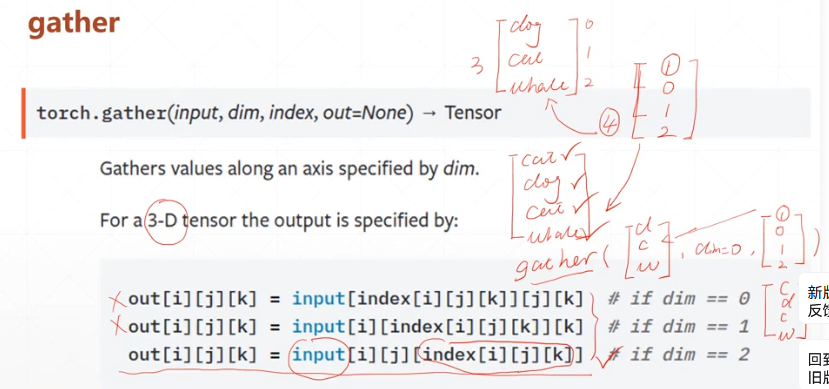

In [16]:
prob = torch.randn(4,10)
idx = prob.topk(dim=1,k=3)
idx

torch.return_types.topk(
values=tensor([[ 0.8943,  0.0567, -0.4184],
        [ 1.7529,  0.7156,  0.4374],
        [ 1.8016,  0.8331,  0.7492],
        [ 0.7207,  0.6075,  0.2779]]),
indices=tensor([[4, 7, 5],
        [8, 6, 1],
        [8, 0, 1],
        [1, 2, 8]]))

相对label表 idx

In [17]:
idx = idx[1]
idx  

tensor([[4, 7, 5],
        [8, 6, 1],
        [8, 0, 1],
        [1, 2, 8]])

In [18]:
label = torch.arange(10)+100
label

tensor([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

全局label表，比如可能是权重表等

In [24]:
label.expand(4,10)

tensor([[100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
        [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
        [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
        [100, 101, 102, 103, 104, 105, 106, 107, 108, 109]])

从全局label表按照相对label表的索引取值

In [23]:
# torch.gather(label.expand(4,10),dim=1,index=idx)
torch.gather(label.expand(4,10),dim=1,index=idx.long())

tensor([[104, 107, 105],
        [108, 106, 101],
        [108, 100, 101],
        [101, 102, 108]])